In [1]:
import os
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

In [2]:
# set up the path to the data files
path = os.chdir('/media/sukanya/data/pure_IL_EMIM_DCA/Simulated-annealing/folder-303.15K/Martini-EMIM-DCA/mapping-2-EMIM-DCA-IL/itp_iterations/TQ5/self_inte_TN4a/self_inte19')

In [3]:
# list all rdf: different bead types for CG simulation
beadB = ['TQ5', 'TN4']
beadA = ['SC6', 'TC6h', 'TC5h']
#beadC = ['TQ1', 'TN4']
#beadD = ['SC6', 'TC6h', 'TC5h']
#bead_names = ['SC6', 'TC6h', 'TC5h']
bead_names = ['TQ5-SC6', 'TQ5-TC6h', 'TQ5-TC5h','TN4-SC6', 'TN4-TC6h', 'TN4-TC5h' ]
gofr_beads = []
cutoff_dis = []

In [4]:
for B in beadB:
    #gofr = []; cutoff = []; 
    for A in beadA:  
        file_name = 'rdf-{}-{}.xvg'.format(B, A) 
        data = np.loadtxt(file_name, skiprows=25)
        data.view(np.float64)
        gofr_value = data[:1470,1]
        dist_value = data[:1470,0]
        print(file_name)
 
        gofr_beads.append(gofr_value)
        cutoff_dis.append(dist_value)

rdf-TQ5-SC6.xvg
rdf-TQ5-TC6h.xvg
rdf-TQ5-TC5h.xvg
rdf-TN4-SC6.xvg
rdf-TN4-TC6h.xvg
rdf-TN4-TC5h.xvg


In [5]:
gofr = []
cutoff = []
bead_names = ['TQ5-SC6', 'TQ5-TC6h', 'TQ5-TC5h','TN4-SC6', 'TN4-TC6h', 'TN4-TC5h' ]
# list all rdf: different bead types for CG simulation
beadB = ['TQ1', 'TN4']
beadA = ['SC6', 'TC6h', 'TC5h']
for B in beadB:
    #gofr = []; cutoff = []; 
    for A in beadA:  
        file_name = 'rdf-{}-{}-AA.xvg'.format(B, A) 
        data = np.loadtxt(file_name, skiprows=25)
        data.view(np.float64)
        gofr_value1 = data[:1470,1]
        dist_value1 = data[:1470,0]
        print(file_name)
 
        gofr.append(gofr_value1)
        cutoff.append(dist_value1) 

rdf-TQ1-SC6-AA.xvg
rdf-TQ1-TC6h-AA.xvg
rdf-TQ1-TC5h-AA.xvg
rdf-TN4-SC6-AA.xvg
rdf-TN4-TC6h-AA.xvg
rdf-TN4-TC5h-AA.xvg


0
1
2
3
4
5


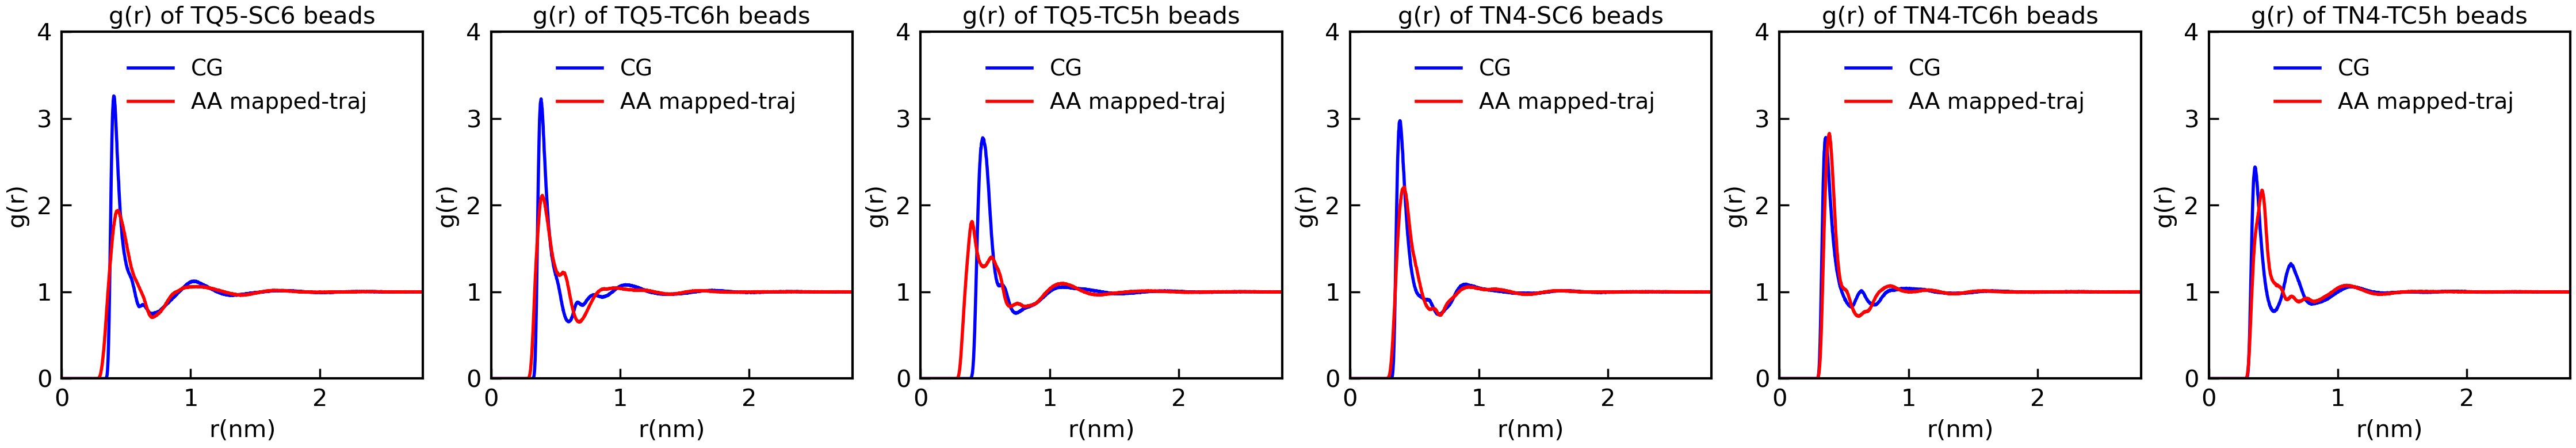

In [20]:
# plot everything

### gofr for all combination beads
a = 1; b =6; c = 1 # initialize plot counter
fig = plt.figure(figsize=(45,8))
from pylab import*
rc('axes', linewidth=3.0)
diff = []
di = []
for i in range(0,6):
        plt.subplot(a,b,c)
        c += 1
        print(i)
        
#for i in range(0,6):
#        print(i)
       
        plt.ylabel('g(r)', fontsize=30, labelpad=10,  fontname='sans-serif')
        plt.xlabel('r(nm)',fontsize=30,labelpad=10, fontname='sans-serif' )
        plt.ylim([0, 4])
        plt.xlim([0, 2.8])
        plt.tick_params(axis='both', which='major', length=12, direction='in', width=2.5, labelsize=30, pad=12)
        diff = (gofr[i] - gofr_beads[i]).mean()
        di.append(diff)
        plt.plot(cutoff_dis[i], gofr_beads[i], linewidth=4,color='b',label="CG" )
        plt.plot(cutoff[i], gofr[i], linewidth=4,color='r', label="AA mapped-traj")
        plt.title(format(di[i], ".4f"), y=0.6, pad=-14, fontsize=40)
        plt.title('g(r) of {} beads'.format(bead_names[i]), fontsize=30, pad=10)
        plt.legend(fontsize=28, bbox_to_anchor=(0.90,0.98), loc='upper right', edgecolor='white')
fig.tight_layout()
#fig.suptitle('gofr for {} beads'.format(bead_names[i]), fontsize=30)
fig.savefig("anion-cation-final.png", dpi=500, transparent=True, )

plt.show()        